### Feature extraction

In [4]:
import pandas as pd
import string
import collections
import nltk

In [5]:
df=pd.read_csv("thebiglist_clean.csv")
df

,Unnamed: 0,Brand,Variety,Style,Country,Stars
0,0,Higashimaru,Seafood Sara Udon,Pack,Japan,5.0
1,1,Single Grain,Chongqing Spicy & Sour Rice Noodles,Cup,China,3.5
2,2,Sau Tao,Seafood Flavour Sichuan Spicy Noodle,Pack,Hong Kong,5.0
3,3,Sau Tao,Jiangnan Style Noodle - Original Flavour,Pack,Hong Kong,4.5
4,4,Sapporo Ichiban,CupStar Shio Ramen,Cup,Japan,3.5
...,...,...,...,...,...,...
3687,3697,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.5
3688,3698,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1.0
3689,3699,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2.0
3690,3700,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2.0


In [6]:
 variety=df["Variety"]
 variety

0                                       Seafood Sara Udon
1                     Chongqing Spicy & Sour Rice Noodles
2                    Seafood Flavour Sichuan Spicy Noodle
3                Jiangnan Style Noodle - Original Flavour
4                                      CupStar Shio Ramen
                              ...                        
3687    Hu Tiu Nam Vang ["Phnom Penh" style] Asian Sty...
3688                       Oriental Style Instant Noodles
3689                                       Tom Yum Shrimp
3690                                 Tom Yum Chili Flavor
3691                                           Miso Ramen
Name: Variety, Length: 3692, dtype: object

In [7]:
variety_text=" ".join(variety)
variety_text

'Seafood Sara Udon Chongqing Spicy & Sour Rice Noodles Seafood Flavour Sichuan Spicy Noodle Jiangnan Style Noodle - Original Flavour CupStar Shio Ramen Big Boss Broad Noodle Chili Oil Flavor (Sour & Hot) Top Ramen Masala Noodles Miyashi Chuka Cold Noodle Tanukioyaji Super Spicy Mazemen Michio Kawamura Nature Ramen Shio Mochichi Wonton Noodle Instant Yakosoba XL Chajang (Bean Sauce) Flavor Spicy Baby Clam Flavor Cup Instant Rice Noodles Oriental Kitchen Hot Korean Instant Noodles Coconut Chicken Curry Rice Noodle Soup Shoyu Flavor Karaage Ginger Shio Ramen Raoh Soy Sauce Flavor Ramen Souper Bowl Noodle Pho Rice Noodle Mild Sekai no Yamachan Phantom Chicken Wings Yakisoba Artificial Beef With Sauerkraut Quick Pasta Creamy Icon Ramen Noodles Creamy Chicken Gumbo Mi Instant Rasa Vegetarian Shin Red Super Spicy Buldak Challenge Daimori Osaka Kasoudon Pepper Sesame Red Oil Sesame Paste Fragrant In Original Taste Sesame Paste Kiseki Ramen Chicken Flavor Ramen Hotter & Spicier Ramen Beef Flavo

In [8]:
variety_text_lower=variety_text.lower()
variety_text_lower

'seafood sara udon chongqing spicy & sour rice noodles seafood flavour sichuan spicy noodle jiangnan style noodle - original flavour cupstar shio ramen big boss broad noodle chili oil flavor (sour & hot) top ramen masala noodles miyashi chuka cold noodle tanukioyaji super spicy mazemen michio kawamura nature ramen shio mochichi wonton noodle instant yakosoba xl chajang (bean sauce) flavor spicy baby clam flavor cup instant rice noodles oriental kitchen hot korean instant noodles coconut chicken curry rice noodle soup shoyu flavor karaage ginger shio ramen raoh soy sauce flavor ramen souper bowl noodle pho rice noodle mild sekai no yamachan phantom chicken wings yakisoba artificial beef with sauerkraut quick pasta creamy icon ramen noodles creamy chicken gumbo mi instant rasa vegetarian shin red super spicy buldak challenge daimori osaka kasoudon pepper sesame red oil sesame paste fragrant in original taste sesame paste kiseki ramen chicken flavor ramen hotter & spicier ramen beef flavo

In [9]:
punc_list=list(string.punctuation)
punc_list

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~']

In [10]:
variety_clean="".join([char for char in variety_text_lower if char  not in punc_list])
variety_clean

'seafood sara udon chongqing spicy  sour rice noodles seafood flavour sichuan spicy noodle jiangnan style noodle  original flavour cupstar shio ramen big boss broad noodle chili oil flavor sour  hot top ramen masala noodles miyashi chuka cold noodle tanukioyaji super spicy mazemen michio kawamura nature ramen shio mochichi wonton noodle instant yakosoba xl chajang bean sauce flavor spicy baby clam flavor cup instant rice noodles oriental kitchen hot korean instant noodles coconut chicken curry rice noodle soup shoyu flavor karaage ginger shio ramen raoh soy sauce flavor ramen souper bowl noodle pho rice noodle mild sekai no yamachan phantom chicken wings yakisoba artificial beef with sauerkraut quick pasta creamy icon ramen noodles creamy chicken gumbo mi instant rasa vegetarian shin red super spicy buldak challenge daimori osaka kasoudon pepper sesame red oil sesame paste fragrant in original taste sesame paste kiseki ramen chicken flavor ramen hotter  spicier ramen beef flavor ramen 

In [11]:
variety_tokens=nltk.tokenize.word_tokenize(variety_clean)
variety_tokens

['seafood',
 'sara',
 'udon',
 'chongqing',
 'spicy',
 'sour',
 'rice',
 'noodles',
 'seafood',
 'flavour',
 'sichuan',
 'spicy',
 'noodle',
 'jiangnan',
 'style',
 'noodle',
 'original',
 'flavour',
 'cupstar',
 'shio',
 'ramen',
 'big',
 'boss',
 'broad',
 'noodle',
 'chili',
 'oil',
 'flavor',
 'sour',
 'hot',
 'top',
 'ramen',
 'masala',
 'noodles',
 'miyashi',
 'chuka',
 'cold',
 'noodle',
 'tanukioyaji',
 'super',
 'spicy',
 'mazemen',
 'michio',
 'kawamura',
 'nature',
 'ramen',
 'shio',
 'mochichi',
 'wonton',
 'noodle',
 'instant',
 'yakosoba',
 'xl',
 'chajang',
 'bean',
 'sauce',
 'flavor',
 'spicy',
 'baby',
 'clam',
 'flavor',
 'cup',
 'instant',
 'rice',
 'noodles',
 'oriental',
 'kitchen',
 'hot',
 'korean',
 'instant',
 'noodles',
 'coconut',
 'chicken',
 'curry',
 'rice',
 'noodle',
 'soup',
 'shoyu',
 'flavor',
 'karaage',
 'ginger',
 'shio',
 'ramen',
 'raoh',
 'soy',
 'sauce',
 'flavor',
 'ramen',
 'souper',
 'bowl',
 'noodle',
 'pho',
 'rice',
 'noodle',
 'mild',
 

In [12]:
variety_counter=collections.Counter(variety_tokens)
variety_counter

Counter({'seafood': 140,
         'sara': 3,
         'udon': 124,
         'chongqing': 10,
         'spicy': 413,
         'sour': 59,
         'rice': 178,
         'noodles': 889,
         'flavour': 517,
         'sichuan': 31,
         'noodle': 762,
         'jiangnan': 3,
         'style': 122,
         'original': 42,
         'cupstar': 5,
         'shio': 50,
         'ramen': 630,
         'big': 58,
         'boss': 2,
         'broad': 9,
         'chili': 58,
         'oil': 54,
         'flavor': 491,
         'hot': 187,
         'top': 28,
         'masala': 24,
         'miyashi': 1,
         'chuka': 6,
         'cold': 14,
         'tanukioyaji': 1,
         'super': 44,
         'mazemen': 1,
         'michio': 3,
         'kawamura': 3,
         'nature': 3,
         'mochichi': 1,
         'wonton': 13,
         'instant': 560,
         'yakosoba': 1,
         'xl': 2,
         'chajang': 5,
         'bean': 33,
         'sauce': 211,
         'baby': 6,
       

In [13]:
variety_counter.most_common()

[('noodles', 889),
 ('noodle', 762),
 ('ramen', 630),
 ('instant', 560),
 ('flavour', 517),
 ('flavor', 491),
 ('chicken', 419),
 ('spicy', 413),
 ('soup', 314),
 ('beef', 314),
 ('cup', 252),
 ('with', 224),
 ('sauce', 211),
 ('curry', 188),
 ('hot', 187),
 ('rice', 178),
 ('tom', 152),
 ('shrimp', 151),
 ('artificial', 149),
 ('mi', 142),
 ('seafood', 140),
 ('pork', 140),
 ('bowl', 138),
 ('udon', 124),
 ('style', 122),
 ('tonkotsu', 108),
 ('yum', 107),
 ('yakisoba', 99),
 ('goreng', 96),
 ('sesame', 89),
 ('vermicelli', 85),
 ('miso', 81),
 ('shoyu', 77),
 ('oriental', 71),
 ('vegetable', 71),
 ('soy', 70),
 ('kimchi', 68),
 ('demae', 67),
 ('penang', 66),
 ('vegetarian', 61),
 ('mushroom', 61),
 ('sour', 59),
 ('big', 58),
 ('chili', 58),
 ('black', 56),
 ('fried', 56),
 ('oil', 54),
 ('rasa', 52),
 ('sabor', 52),
 ('ramyun', 52),
 ('laksa', 51),
 ('shio', 50),
 ('soba', 50),
 ('thai', 50),
 ('japanese', 49),
 ('korean', 48),
 ('taste', 48),
 ('tomato', 47),
 ('chow', 47),
 ('pep

In [14]:
is_spicy=[]

hot_flavor=["spicy",
            "curry",
            "hot",
            "tom",
            "chili",
            "chilli",
            "kari",
            "pendas",
            "laksa"]
for variety in df['Variety'].str.lower():
    if any(flavor in variety for flavor in hot_flavor):
        is_spicy.append(1)
    else:
        is_spicy.append(0)
df['isSpicy']=is_spicy
df

,Unnamed: 0,Brand,Variety,Style,Country,Stars,isSpicy
0,0,Higashimaru,Seafood Sara Udon,Pack,Japan,5.0,0
1,1,Single Grain,Chongqing Spicy & Sour Rice Noodles,Cup,China,3.5,1
2,2,Sau Tao,Seafood Flavour Sichuan Spicy Noodle,Pack,Hong Kong,5.0,1
3,3,Sau Tao,Jiangnan Style Noodle - Original Flavour,Pack,Hong Kong,4.5,0
4,4,Sapporo Ichiban,CupStar Shio Ramen,Cup,Japan,3.5,0
...,...,...,...,...,...,...,...
3687,3697,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.5,0
3688,3698,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1.0,0
3689,3699,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2.0,1
3690,3700,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2.0,1


In [15]:
has_chicken=[]

for variety in df['Variety'].str.lower():
    if('chicken' in variety) or ('ayam' in variety):
        has_chicken.append(1)
    else:
        has_chicken.append(0)
        
df['hasChicken']=has_chicken
df

,Unnamed: 0,Brand,Variety,Style,Country,Stars,isSpicy,hasChicken
0,0,Higashimaru,Seafood Sara Udon,Pack,Japan,5.0,0,0
1,1,Single Grain,Chongqing Spicy & Sour Rice Noodles,Cup,China,3.5,1,0
2,2,Sau Tao,Seafood Flavour Sichuan Spicy Noodle,Pack,Hong Kong,5.0,1,0
3,3,Sau Tao,Jiangnan Style Noodle - Original Flavour,Pack,Hong Kong,4.5,0,0
4,4,Sapporo Ichiban,CupStar Shio Ramen,Cup,Japan,3.5,0,0
...,...,...,...,...,...,...,...,...
3687,3697,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.5,0,0
3688,3698,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1.0,0,0
3689,3699,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2.0,1,0
3690,3700,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2.0,1,0


In [16]:
df.sample(10)

,Unnamed: 0,Brand,Variety,Style,Country,Stars,isSpicy,hasChicken
2340,2350,Mamee,SLLRRRP! Kari Berapi,Pack,Malaysia,3.75,1,0
1120,1127,Samyang Foods,Kimchi song Song Ramen,Pack,South Korea,4.75,0,0
1793,1802,Ibumie,Always Mi Goreng Perisa Kari Kapitan,Pack,Malaysia,5.00,1,0
2862,2872,Seven-Eleven,Seven & I Shoyu,Cup,Japan,4.50,0,0
1105,1112,JML,Bone Soup (Spare Ribs Flavour) Noodle,Pack,China,3.25,0,0
3526,3536,Koyo,Garlic Pepper,Pack,United States,3.25,0,0
2470,2480,Nissin,Soba Classic Noodles With Japanese Yakisoba Sauce,Cup,Germany,3.75,0,0
2047,2056,New Way,Spaghetti Instant Noodles,Tray,Vietnam,4.00,0,0
3536,3546,Maruchan,Instant Lunch Cajun Style With chili Piquin Sh...,Cup,United States,3.00,1,0
1535,1544,A-Sha Dry Noodle,Chow Mein Original Flavor,Tray,Taiwan,5.00,0,0


In [17]:
has_beef=[]

for variety in df['Variety'].str.lower():
    if('beef' in variety) or ('cow' in variety):
        has_beef.append(1)
    else:
        has_beef.append(0)
        
df['hasBeef']=has_beef
df

,Unnamed: 0,Brand,Variety,Style,Country,Stars,isSpicy,hasChicken,hasBeef
0,0,Higashimaru,Seafood Sara Udon,Pack,Japan,5.0,0,0,0
1,1,Single Grain,Chongqing Spicy & Sour Rice Noodles,Cup,China,3.5,1,0,0
2,2,Sau Tao,Seafood Flavour Sichuan Spicy Noodle,Pack,Hong Kong,5.0,1,0,0
3,3,Sau Tao,Jiangnan Style Noodle - Original Flavour,Pack,Hong Kong,4.5,0,0,0
4,4,Sapporo Ichiban,CupStar Shio Ramen,Cup,Japan,3.5,0,0,0
...,...,...,...,...,...,...,...,...,...
3687,3697,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.5,0,0,0
3688,3698,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1.0,0,0,0
3689,3699,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2.0,1,0,0
3690,3700,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2.0,1,0,0


In [18]:
df.sample(10)

,Unnamed: 0,Brand,Variety,Style,Country,Stars,isSpicy,hasChicken,hasBeef
440,441,Kikusui,Shirakaba Sansou Miso Ramen,Box,Japan,4.50,0,0,0
2561,2571,Wei Lih,What’s That? Leisure Meatballs Chicken Flavor,Pack,Taiwan,3.75,0,1,0
2700,2710,Prima Taste,Singapore Laksa La Mian,Pack,Singapore,5.00,1,0,0
3609,3619,Nissin,Demae Ramen Spicy Flavor,Pack,Japan,2.00,1,0,0
759,762,Sapporo Ichiban,Miso Ramen,Bowl,Japan,3.75,0,0,0
695,698,Wei Lih,Hell Spicy Dry Noodle With Soup,Bowl,Taiwan,4.00,1,0,0
2490,2500,Sugakiya Foods,Udon Miso Stew,Pack,Japan,3.25,0,0,0
3177,3187,Tradition,Imitation Beef,Cup,United States,2.50,0,0,1
264,264,Nissin,Cup Noodles Big Extra Spicy Tonkotsu,Cup,Hong Kong,3.25,1,0,0
1276,1285,Super Bihun,Bihun Kuah Rasa Baso Sapi,Pack,Indonesia,3.75,0,0,0


In [19]:
has_seafood=[]
seafood_flavor=["seafood",
               "fish",
               "shrimp",
               "crab",
               "prawn"]
for variety in df['Variety'].str.lower():
    if any(flavor in variety for flavor in seafood_flavor):
        has_seafood.append(1)
    else:
        has_seafood.append(0)
df['hasSeafood']=has_seafood
df





,Unnamed: 0,Brand,Variety,Style,Country,Stars,isSpicy,hasChicken,hasBeef,hasSeafood
0,0,Higashimaru,Seafood Sara Udon,Pack,Japan,5.0,0,0,0,1
1,1,Single Grain,Chongqing Spicy & Sour Rice Noodles,Cup,China,3.5,1,0,0,0
2,2,Sau Tao,Seafood Flavour Sichuan Spicy Noodle,Pack,Hong Kong,5.0,1,0,0,1
3,3,Sau Tao,Jiangnan Style Noodle - Original Flavour,Pack,Hong Kong,4.5,0,0,0,0
4,4,Sapporo Ichiban,CupStar Shio Ramen,Cup,Japan,3.5,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
3687,3697,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.5,0,0,0,0
3688,3698,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1.0,0,0,0,0
3689,3699,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2.0,1,0,0,1
3690,3700,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2.0,1,0,0,0


In [20]:
df.sample(10)

,Unnamed: 0,Brand,Variety,Style,Country,Stars,isSpicy,hasChicken,hasBeef,hasSeafood
2880,2890,Master Kong,Spicy Beef,Pack,China,3.75,1,0,1,0
1313,1322,Pulmuone,Non-Fried Ramyun With Spicy Beef Broth,Pack,South Korea,3.75,1,0,1,0
3006,3016,Mi Sedaap,Mi Segera Mi Goreng Perisa Sambal Goreng,Pack,Indonesia,4.50,0,0,0,0
2244,2254,Nissin,Premium Instant Noodles Roasted Beef Flavour,Pack,Singapore,4.25,0,0,1,0
2484,2494,Golden Wheat,Korean Style Stew Prok Flavour Cooking Noodle,Pack,China,3.50,0,0,0,0
235,235,Sapporo Ichiban,Mentai Agodashi Shoyu Ramen,Bowl,Japan,3.75,0,0,0,0
1915,1924,JML,Spicy King Spicy Chicken,Pack,China,5.00,1,1,0,0
2718,2728,Pot Noodle,Chilli Beef Flavour,Cup,UK,2.25,1,0,1,0
1254,1263,Uni-President,Man Han Feast Super Hot Pot Beef Flavor Instan...,Bowl,Taiwan,5.00,1,0,1,0
1581,1590,Nissin,Chilli Noodles Spicy Tom Yum Flavour,Pack,Thailand,3.75,1,0,0,0


### DATA EXPLORATION

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
brand_count=df['Brand'].value_counts()[:50]
brand_count

Nissin               476
Maruchan             131
Nongshim             119
Myojo                111
Samyang Foods        102
Paldo                 84
Mama                  71
Sapporo Ichiban       69
Indomie               56
Ottogi                50
Acecook               48
Sau Tao               48
KOKA                  39
Maggi                 38
Vifon                 36
MyKuali               35
Lucky Me!             34
Vina Acecook          34
Mamee                 34
MAMA                  33
Ve Wong               32
Master Kong           29
JML                   28
Wei Lih               28
Vedan                 28
Wai Wai               26
A-Sha Dry Noodle      26
Yum Yum               23
Wu-Mu                 23
Itsuki                20
Samyang               19
Uni-President         18
New Touch             18
Sichuan Baijia        18
Doll                  18
Koka                  18
Little Cook           17
Batchelors            16
Mr. Noodles           16
Kamfen                15


In [23]:
brand_count.sort_values(ascending=True)

Deshome               13
Menraku               13
Itomen                13
Vit's                 13
Saigon Ve Wong        13
Mr. Lee's Noodles     14
ABC                   14
Takamori Kosan        14
Asian Thai Foods      14
Daikoku               15
Kamfen                15
Mr. Noodles           16
Batchelors            16
Little Cook           17
Doll                  18
Sichuan Baijia        18
New Touch             18
Uni-President         18
Koka                  18
Samyang               19
Itsuki                20
Wu-Mu                 23
Yum Yum               23
A-Sha Dry Noodle      26
Wai Wai               26
Vedan                 28
JML                   28
Wei Lih               28
Master Kong           29
Ve Wong               32
MAMA                  33
Mamee                 34
Vina Acecook          34
Lucky Me!             34
MyKuali               35
Vifon                 36
Maggi                 38
KOKA                  39
Sau Tao               48
Acecook               48


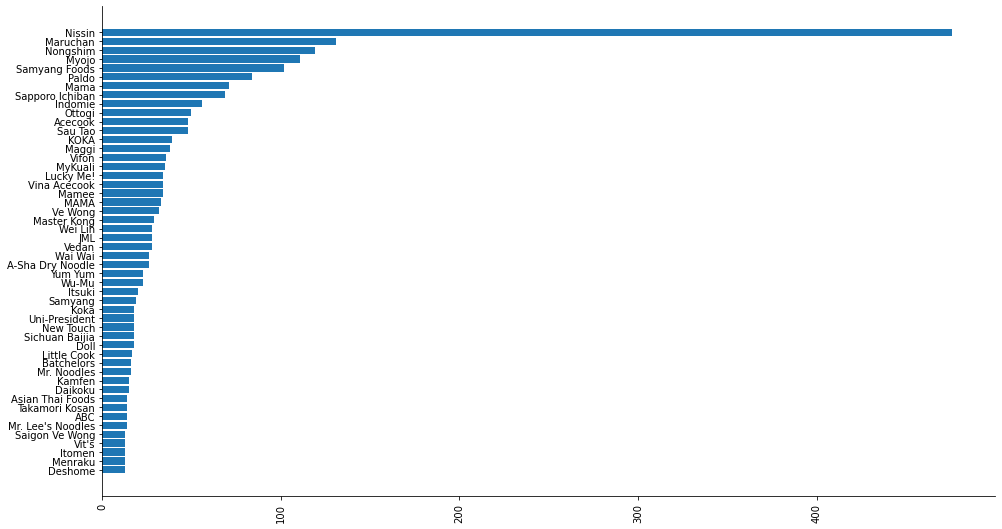

In [24]:
plt.figure(figsize=(16,9))
plt.barh(brand_count.sort_values(ascending=True).index,
         brand_count.sort_values(ascending=True))
plt.xticks(rotation=90)
sns.despine()

In [25]:
style_count=df['Style'].value_counts()
style_count

Pack          2085
Bowl           722
Cup            659
Tray           167
Box             54
Restaurant       3
Bar              1
Can              1
Name: Style, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

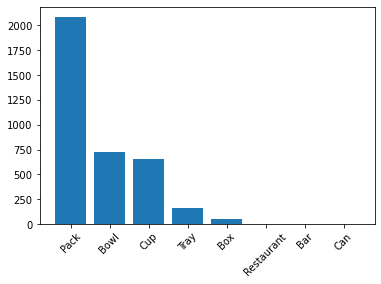

In [26]:
plt.bar(style_count.index,style_count)
plt.xticks(rotation=45)

In [27]:
country_count=df['Country'].value_counts()
len(country_count)

51

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
 

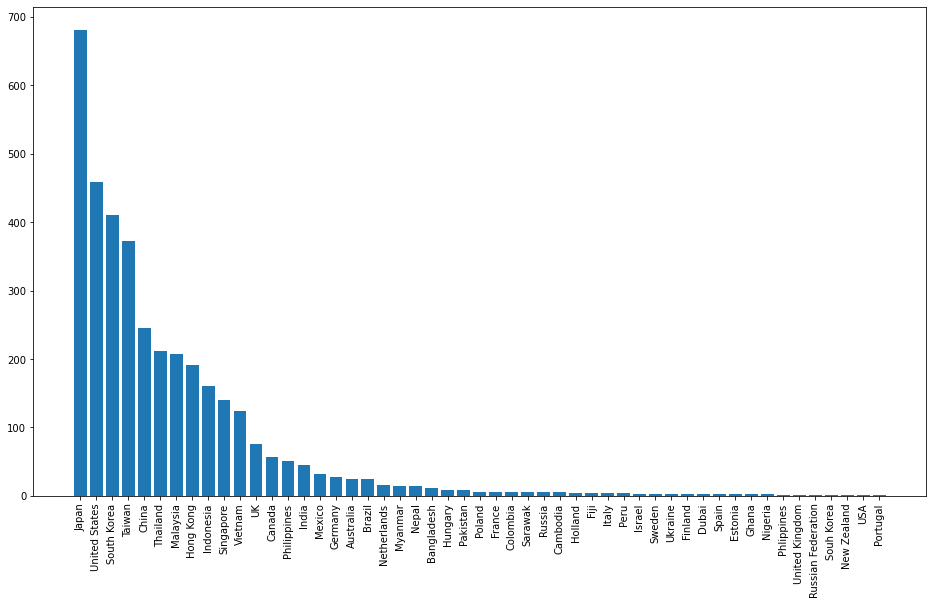

In [28]:
plt.figure(figsize=(16,9))
plt.bar(country_count.index,country_count)
plt.xticks(rotation=90)

(array([  58.,   23.,   54.,   79.,  127.,  210.,  399., 1081.,  658.,
        1003.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

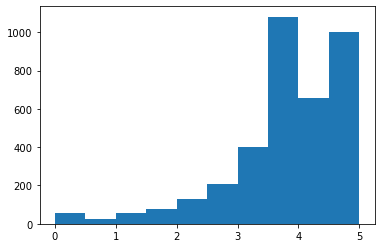

In [29]:
plt.hist(df["Stars"])

In [30]:
df["Stars"].median()

3.75

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='isSpicy', ylabel='count'>

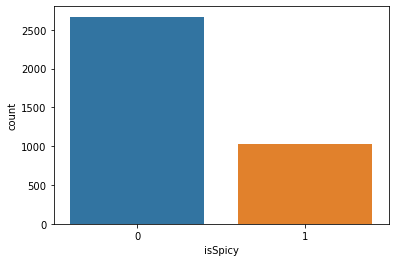

In [31]:
sns.countplot(df['isSpicy'])

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hasSeafood', ylabel='count'>

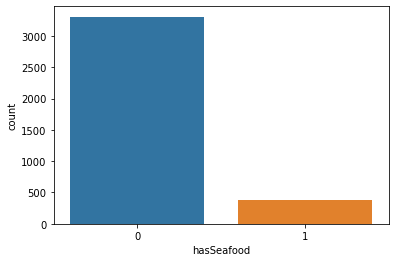

In [32]:
sns.countplot(df['hasSeafood'])

questions to ask:

1.Which Brand has the highest stars
2.Which Country has the highest stars
3.Which noodle has the highest stars-spicy or non spicy.

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Nissin'),
  Text(1, 0, 'Maruchan'),
  Text(2, 0, 'Nongshim'),
  Text(3, 0, 'Myojo'),
  Text(4, 0, 'Samyang Foods'),
  Text(5, 0, 'Paldo'),
  Text(6, 0, 'Mama'),
  Text(7, 0, 'Sapporo Ichiban'),
  Text(8, 0, 'Indomie'),
  Text(9, 0, 'Ottogi'),
  Text(10, 0, 'Acecook'),
  Text(11, 0, 'Sau Tao'),
  Text(12, 0, 'KOKA'),
  Text(13, 0, 'Maggi'),
  Text(14, 0, 'Vifon'),
  Text(15, 0, 'MyKuali'),
  Text(16, 0, 'Lucky Me!'),
  Text(17, 0, 'Vina Acecook'),
  Text(18, 0, 'Mamee'),
  Text(19, 0, 'MAMA')])

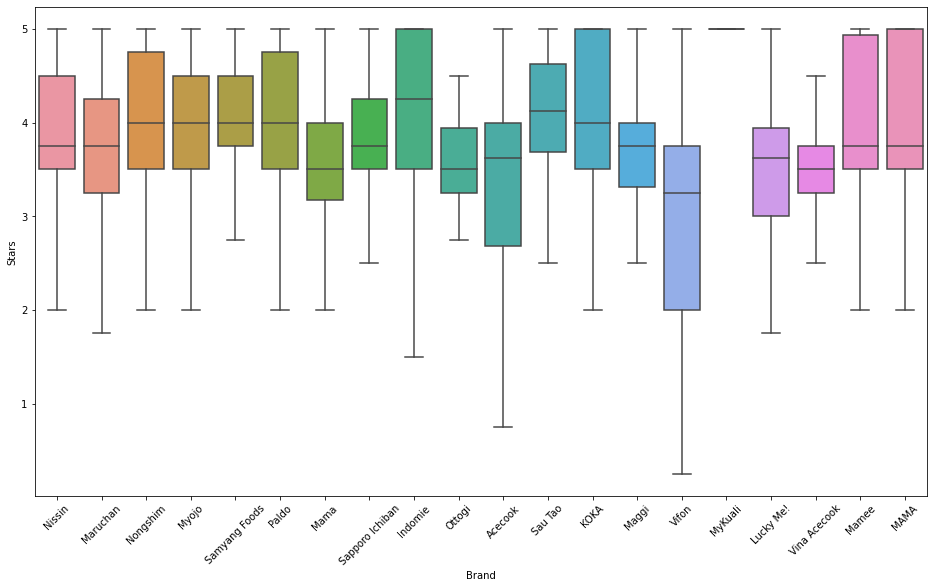

In [33]:
plt.figure(figsize=(16,9))
sns.boxplot(df['Brand'], df['Stars'], order=brand_count.index[:20],showfliers=False)
plt.xticks(rotation=45)

In [34]:
brand_count

Nissin               476
Maruchan             131
Nongshim             119
Myojo                111
Samyang Foods        102
Paldo                 84
Mama                  71
Sapporo Ichiban       69
Indomie               56
Ottogi                50
Acecook               48
Sau Tao               48
KOKA                  39
Maggi                 38
Vifon                 36
MyKuali               35
Lucky Me!             34
Vina Acecook          34
Mamee                 34
MAMA                  33
Ve Wong               32
Master Kong           29
JML                   28
Wei Lih               28
Vedan                 28
Wai Wai               26
A-Sha Dry Noodle      26
Yum Yum               23
Wu-Mu                 23
Itsuki                20
Samyang               19
Uni-President         18
New Touch             18
Sichuan Baijia        18
Doll                  18
Koka                  18
Little Cook           17
Batchelors            16
Mr. Noodles           16
Kamfen                15


In [35]:
df[df['Brand']=='MyKuali']

,Unnamed: 0,Brand,Variety,Style,Country,Stars,isSpicy,hasChicken,hasBeef,hasSeafood
188,188,MyKuali,White Fish Broth Cup Noodle,Cup,Malaysia,5.00,0,0,0,1
199,199,MyKuali,Penang Red Tom Yum Goong Rice Vermicelli Soup ...,Bowl,Malaysia,5.00,1,0,0,0
213,213,MyKuali,White Fish Broth Rice Vermicelli,Bowl,Malaysia,5.00,0,0,0,1
229,229,MyKuali,White Fish Broth Noodle,Pack,Malaysia,5.00,0,0,0,1
230,230,MyKuali,Penang White Curry Noodle (New Recipe),Pack,Malaysia,5.00,1,0,0,0
490,491,MyKuali,Gaeng Som Noodle,Cup,Malaysia,4.50,0,0,0,0
942,945,MyKuali,Hokkien Prawn (2018 Recipe),Pack,Malaysia,5.00,0,0,0,1
951,954,MyKuali,Penang Red Tom Yum Goong Noodle (2018 Recipe),Pack,Malaysia,5.00,1,0,0,0
958,961,MyKuali,Penang White Curry Noodle (2018 Recipe),Pack,Malaysia,5.00,1,0,0,0
1020,1023,MyKuali,Penang White Curry Noodle,Pack,Malaysia,5.00,1,0,0,0


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Japan'),
  Text(1, 0, 'United States'),
  Text(2, 0, 'South Korea'),
  Text(3, 0, 'Taiwan'),
  Text(4, 0, 'China'),
  Text(5, 0, 'Thailand'),
  Text(6, 0, 'Malaysia'),
  Text(7, 0, 'Hong Kong'),
  Text(8, 0, 'Indonesia'),
  Text(9, 0, 'Singapore'),
  Text(10, 0, 'Vietnam'),
  Text(11, 0, 'UK'),
  Text(12, 0, 'Canada'),
  Text(13, 0, 'Philippines'),
  Text(14, 0, 'India'),
  Text(15, 0, 'Mexico'),
  Text(16, 0, 'Germany'),
  Text(17, 0, 'Australia'),
  Text(18, 0, 'Brazil'),
  Text(19, 0, 'Netherlands')])

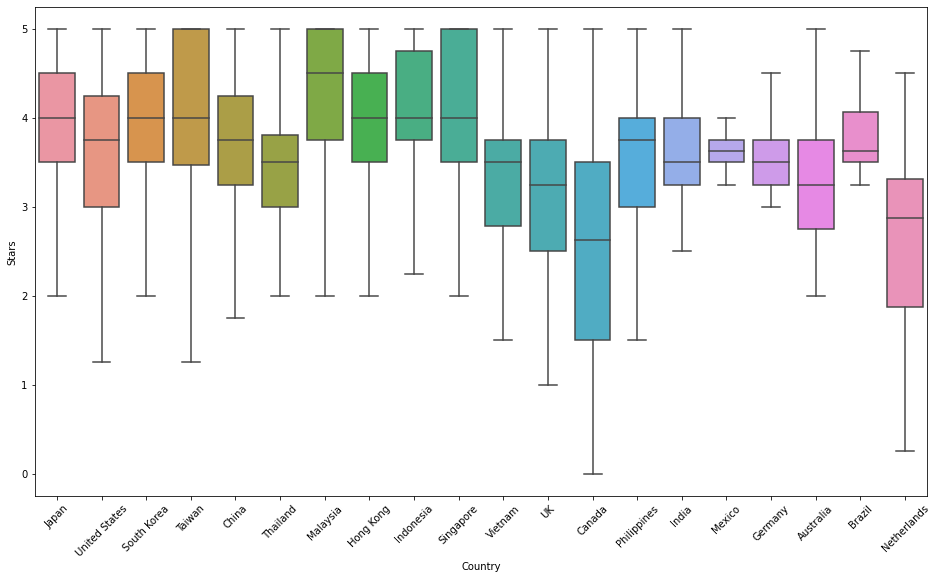

In [36]:
plt.figure(figsize=(16,9))
sns.boxplot(df['Country'], df['Stars'], order=country_count.index[:20],showfliers=False)
plt.xticks(rotation=45)

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='isSpicy', ylabel='Stars'>

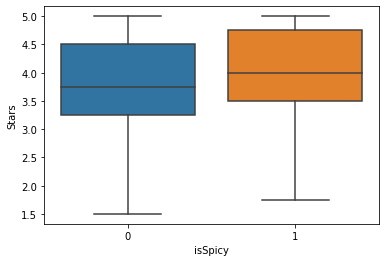

In [37]:
sns.boxplot(df['isSpicy'], df['Stars'], showfliers=False)

In [38]:
spicy_df=df[df['isSpicy']==1]
nonspicy_df=df[df['isSpicy']==0]

spicy_df

,Unnamed: 0,Brand,Variety,Style,Country,Stars,isSpicy,hasChicken,hasBeef,hasSeafood
1,1,Single Grain,Chongqing Spicy & Sour Rice Noodles,Cup,China,3.50,1,0,0,0
2,2,Sau Tao,Seafood Flavour Sichuan Spicy Noodle,Pack,Hong Kong,5.00,1,0,0,1
5,5,Sichuan Baijia,Big Boss Broad Noodle Chili Oil Flavor (Sour &...,Cup,China,4.50,1,0,0,0
8,8,Yamamoto Seifun,Tanukioyaji Super Spicy Mazemen,Bowl,Japan,3.50,1,0,0,0
12,12,MAMA,Spicy Baby Clam Flavor Cup Instant Rice Noodles,Cup,Thailand,4.25,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
3674,3684,Ottogi,Jin Ramen (Hot Taste),Pack,South Korea,3.50,1,0,0,0
3676,3686,Samyang,Kalgug-Su (Spicy),Pack,South Korea,3.50,1,0,0,0
3678,3688,Samyang,Hot,Pack,South Korea,3.50,1,0,0,0
3689,3699,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2.00,1,0,0,1


In [39]:
print(spicy_df['Stars'].median())
print(nonspicy_df['Stars'].median())

4.0
3.75


(array([ 44.,  17.,  43.,  64.,  83., 171., 312., 804., 454., 677.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

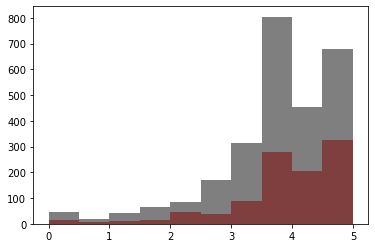

In [40]:
plt.hist(spicy_df['Stars'],alpha=0.5,color='red')
plt.hist(nonspicy_df['Stars'],alpha=0.5,color='black')

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Stars', ylabel='Density'>

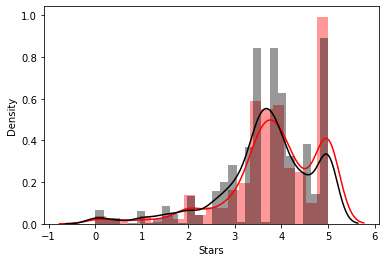

In [41]:
sns.distplot(spicy_df['Stars'],color='red')
sns.distplot(nonspicy_df['Stars'],color='black')

In [42]:
from scipy.stats import mannwhitneyu

In [43]:
mannwhitneyu(spicy_df['Stars'],nonspicy_df['Stars'])

MannwhitneyuResult(statistic=1210361.0, pvalue=3.7035634850869064e-08)

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hasChicken', ylabel='Stars'>

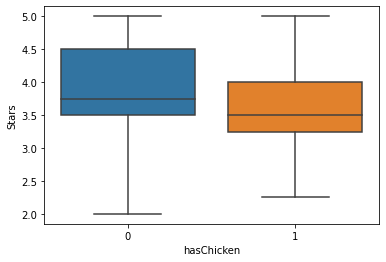

In [44]:
sns.boxplot(df['hasChicken'],df['Stars'],showfliers=False)

In [45]:
mannwhitneyu(df[df['hasChicken']==0]['Stars'],
             df[df['hasChicken']==1]['Stars'])

MannwhitneyuResult(statistic=593212.0, pvalue=2.2524646495376065e-10)

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hasBeef', ylabel='Stars'>

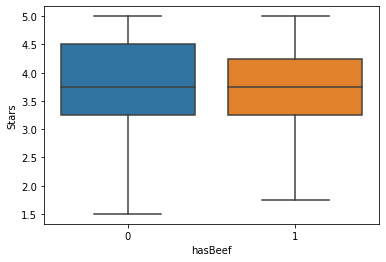

In [46]:
sns.boxplot(df['hasBeef'],df['Stars'],showfliers=False)

In [47]:
mannwhitneyu(df[df['hasBeef']==0]['Stars'],
             df[df['hasBeef']==1]['Stars'])

MannwhitneyuResult(statistic=476664.5, pvalue=0.0017956542204848806)

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hasSeafood', ylabel='Stars'>

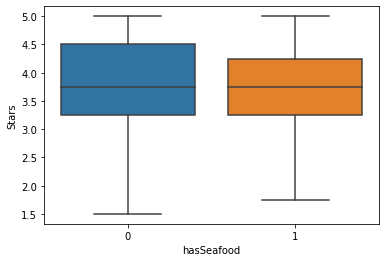

In [48]:
sns.boxplot(df['hasSeafood'],df['Stars'],showfliers=False)

In [49]:
mannwhitneyu(df[df['hasSeafood']==0]['Stars'],
             df[df['hasSeafood']==1]['Stars'])

MannwhitneyuResult(statistic=626226.5, pvalue=0.298820092010756)

In [50]:
df

,Unnamed: 0,Brand,Variety,Style,Country,Stars,isSpicy,hasChicken,hasBeef,hasSeafood
0,0,Higashimaru,Seafood Sara Udon,Pack,Japan,5.0,0,0,0,1
1,1,Single Grain,Chongqing Spicy & Sour Rice Noodles,Cup,China,3.5,1,0,0,0
2,2,Sau Tao,Seafood Flavour Sichuan Spicy Noodle,Pack,Hong Kong,5.0,1,0,0,1
3,3,Sau Tao,Jiangnan Style Noodle - Original Flavour,Pack,Hong Kong,4.5,0,0,0,0
4,4,Sapporo Ichiban,CupStar Shio Ramen,Cup,Japan,3.5,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
3687,3697,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.5,0,0,0,0
3688,3698,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1.0,0,0,0,0
3689,3699,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2.0,1,0,0,1
3690,3700,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2.0,1,0,0,0


In [51]:
df.to_csv('thebiglist_clean_extended.csv',index=None)

In [52]:
pd.read_csv('thebiglist_clean_extended.csv')

,Unnamed: 0,Brand,Variety,Style,Country,Stars,isSpicy,hasChicken,hasBeef,hasSeafood
0,0,Higashimaru,Seafood Sara Udon,Pack,Japan,5.0,0,0,0,1
1,1,Single Grain,Chongqing Spicy & Sour Rice Noodles,Cup,China,3.5,1,0,0,0
2,2,Sau Tao,Seafood Flavour Sichuan Spicy Noodle,Pack,Hong Kong,5.0,1,0,0,1
3,3,Sau Tao,Jiangnan Style Noodle - Original Flavour,Pack,Hong Kong,4.5,0,0,0,0
4,4,Sapporo Ichiban,CupStar Shio Ramen,Cup,Japan,3.5,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
3687,3697,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.5,0,0,0,0
3688,3698,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1.0,0,0,0,0
3689,3699,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2.0,1,0,0,1
3690,3700,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2.0,1,0,0,0


In [53]:
import pandas as pd

In [54]:
df=pd.read_csv('thebiglist_clean_extended.csv')
df

,Unnamed: 0,Brand,Variety,Style,Country,Stars,isSpicy,hasChicken,hasBeef,hasSeafood
0,0,Higashimaru,Seafood Sara Udon,Pack,Japan,5.0,0,0,0,1
1,1,Single Grain,Chongqing Spicy & Sour Rice Noodles,Cup,China,3.5,1,0,0,0
2,2,Sau Tao,Seafood Flavour Sichuan Spicy Noodle,Pack,Hong Kong,5.0,1,0,0,1
3,3,Sau Tao,Jiangnan Style Noodle - Original Flavour,Pack,Hong Kong,4.5,0,0,0,0
4,4,Sapporo Ichiban,CupStar Shio Ramen,Cup,Japan,3.5,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
3687,3697,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.5,0,0,0,0
3688,3698,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1.0,0,0,0,0
3689,3699,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2.0,1,0,0,1
3690,3700,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2.0,1,0,0,0


In [55]:
top_thirty_brands=df['Brand'].value_counts()[:30].index
top_thirty_brands

Index(['Nissin', 'Maruchan', 'Nongshim', 'Myojo', 'Samyang Foods', 'Paldo',
       'Mama', 'Sapporo Ichiban', 'Indomie', 'Ottogi', 'Acecook', 'Sau Tao',
       'KOKA', 'Maggi', 'Vifon', 'MyKuali', 'Lucky Me!', 'Vina Acecook',
       'Mamee', 'MAMA', 'Ve Wong', 'Master Kong', 'JML', 'Wei Lih', 'Vedan',
       'Wai Wai', 'A-Sha Dry Noodle', 'Yum Yum', 'Wu-Mu', 'Itsuki'],
      dtype='object')

In [56]:
new_brand=[]

for brand in df['Brand']:
    if brand in top_thirty_brands:
        new_brand.append(brand)
    else:
        new_brand.append('Other')
        
df['newBrand']=new_brand
df


,Unnamed: 0,Brand,Variety,Style,Country,Stars,isSpicy,hasChicken,hasBeef,hasSeafood,newBrand
0,0,Higashimaru,Seafood Sara Udon,Pack,Japan,5.0,0,0,0,1,Other
1,1,Single Grain,Chongqing Spicy & Sour Rice Noodles,Cup,China,3.5,1,0,0,0,Other
2,2,Sau Tao,Seafood Flavour Sichuan Spicy Noodle,Pack,Hong Kong,5.0,1,0,0,1,Sau Tao
3,3,Sau Tao,Jiangnan Style Noodle - Original Flavour,Pack,Hong Kong,4.5,0,0,0,0,Sau Tao
4,4,Sapporo Ichiban,CupStar Shio Ramen,Cup,Japan,3.5,0,0,0,0,Sapporo Ichiban
...,...,...,...,...,...,...,...,...,...,...,...
3687,3697,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.5,0,0,0,0,Vifon
3688,3698,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1.0,0,0,0,0,Wai Wai
3689,3699,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2.0,1,0,0,1,Wai Wai
3690,3700,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2.0,1,0,0,0,Wai Wai


In [57]:
len(df['newBrand'].value_counts())

31

In [58]:
len(df['Brand'].value_counts())

542

In [59]:
top_four_style=df['Style'].value_counts().index[:4]

new_style=[]

for style in df['Style']:
    if style in top_four_style:
        new_style.append(style)
    else:
        new_style.append('Other')
        
df['newStyle']=new_style
df


,Unnamed: 0,Brand,Variety,Style,Country,Stars,isSpicy,hasChicken,hasBeef,hasSeafood,newBrand,newStyle
0,0,Higashimaru,Seafood Sara Udon,Pack,Japan,5.0,0,0,0,1,Other,Pack
1,1,Single Grain,Chongqing Spicy & Sour Rice Noodles,Cup,China,3.5,1,0,0,0,Other,Cup
2,2,Sau Tao,Seafood Flavour Sichuan Spicy Noodle,Pack,Hong Kong,5.0,1,0,0,1,Sau Tao,Pack
3,3,Sau Tao,Jiangnan Style Noodle - Original Flavour,Pack,Hong Kong,4.5,0,0,0,0,Sau Tao,Pack
4,4,Sapporo Ichiban,CupStar Shio Ramen,Cup,Japan,3.5,0,0,0,0,Sapporo Ichiban,Cup
...,...,...,...,...,...,...,...,...,...,...,...,...
3687,3697,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.5,0,0,0,0,Vifon,Bowl
3688,3698,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1.0,0,0,0,0,Wai Wai,Pack
3689,3699,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2.0,1,0,0,1,Wai Wai,Pack
3690,3700,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2.0,1,0,0,0,Wai Wai,Pack


In [60]:
df['newStyle'].value_counts()

Pack     2085
Bowl      722
Cup       659
Tray      167
Other      59
Name: newStyle, dtype: int64

In [61]:
len(df['Country'].value_counts())

51

In [62]:
df['Country'].value_counts()

Japan                 681
United States         458
South Korea           411
Taiwan                372
China                 245
Thailand              212
Malaysia              207
Hong Kong             191
Indonesia             161
Singapore             140
Vietnam               124
UK                     75
Canada                 56
Philippines            51
India                  45
Mexico                 32
Germany                28
Australia              25
Brazil                 24
Netherlands            16
Myanmar                14
Nepal                  14
Bangladesh             12
Hungary                 9
Pakistan                9
Poland                  6
France                  6
Colombia                6
Sarawak                 5
Russia                  5
Cambodia                5
Holland                 4
Fiji                    4
Italy                   4
Peru                    4
Israel                  3
Sweden                  3
Ukraine                 3
Finland     

In [63]:
len(df)*0.8

2953.6000000000004

In [64]:
top_ten_countries=df['Country'].value_counts()[:10].index
top_ten_countries

Index(['Japan', 'United States', 'South Korea', 'Taiwan', 'China', 'Thailand',
       'Malaysia', 'Hong Kong', 'Indonesia', 'Singapore'],
      dtype='object')

In [65]:
new_country=[]

for country in df['Country']:
    if country in top_ten_countries:
        new_country.append(country)
    else:
        new_country.append('Other')
        
df['newCountry']=new_country
df

,Unnamed: 0,Brand,Variety,Style,Country,Stars,isSpicy,hasChicken,hasBeef,hasSeafood,newBrand,newStyle,newCountry
0,0,Higashimaru,Seafood Sara Udon,Pack,Japan,5.0,0,0,0,1,Other,Pack,Japan
1,1,Single Grain,Chongqing Spicy & Sour Rice Noodles,Cup,China,3.5,1,0,0,0,Other,Cup,China
2,2,Sau Tao,Seafood Flavour Sichuan Spicy Noodle,Pack,Hong Kong,5.0,1,0,0,1,Sau Tao,Pack,Hong Kong
3,3,Sau Tao,Jiangnan Style Noodle - Original Flavour,Pack,Hong Kong,4.5,0,0,0,0,Sau Tao,Pack,Hong Kong
4,4,Sapporo Ichiban,CupStar Shio Ramen,Cup,Japan,3.5,0,0,0,0,Sapporo Ichiban,Cup,Japan
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3687,3697,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.5,0,0,0,0,Vifon,Bowl,Other
3688,3698,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1.0,0,0,0,0,Wai Wai,Pack,Thailand
3689,3699,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2.0,1,0,0,1,Wai Wai,Pack,Thailand
3690,3700,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2.0,1,0,0,0,Wai Wai,Pack,Thailand


In [66]:
df['newCountry'].value_counts()

Japan            681
Other            614
United States    458
South Korea      411
Taiwan           372
China            245
Thailand         212
Malaysia         207
Hong Kong        191
Indonesia        161
Singapore        140
Name: newCountry, dtype: int64

In [67]:
brand_dummy=pd.get_dummies(df['newBrand'],drop_first=True, prefix='from')
brand_dummy

,from_Acecook,from_Indomie,from_Itsuki,from_JML,from_KOKA,from_Lucky Me!,from_MAMA,from_Maggi,from_Mama,from_Mamee,...,from_Sapporo Ichiban,from_Sau Tao,from_Ve Wong,from_Vedan,from_Vifon,from_Vina Acecook,from_Wai Wai,from_Wei Lih,from_Wu-Mu,from_Yum Yum
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3687,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3688,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3689,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3690,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [68]:
style_dummy=pd.get_dummies(df['newStyle'],drop_first=True, prefix='is')
style_dummy

,is_Cup,is_Other,is_Pack,is_Tray
0,0,0,1,0
1,1,0,0,0
2,0,0,1,0
3,0,0,1,0
4,1,0,0,0
...,...,...,...,...
3687,0,0,0,0
3688,0,0,1,0
3689,0,0,1,0
3690,0,0,1,0


In [69]:
country_dummy=pd.get_dummies(df['newCountry'],drop_first=True, prefix='in')
country_dummy

,in_Hong Kong,in_Indonesia,in_Japan,in_Malaysia,in_Other,in_Singapore,in_South Korea,in_Taiwan,in_Thailand,in_United States
0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
3687,0,0,0,0,1,0,0,0,0,0
3688,0,0,0,0,0,0,0,0,1,0
3689,0,0,0,0,0,0,0,0,1,0
3690,0,0,0,0,0,0,0,0,1,0


In [70]:
df_temp=df.drop(['Brand','Variety','Style','Country','newBrand','newStyle','newCountry'],axis=1)
df_temp

,Unnamed: 0,Stars,isSpicy,hasChicken,hasBeef,hasSeafood
0,0,5.0,0,0,0,1
1,1,3.5,1,0,0,0
2,2,5.0,1,0,0,1
3,3,4.5,0,0,0,0
4,4,3.5,0,0,0,0
...,...,...,...,...,...,...
3687,3697,3.5,0,0,0,0
3688,3698,1.0,0,0,0,0
3689,3699,2.0,1,0,0,1
3690,3700,2.0,1,0,0,0


In [71]:
df_temp=df[["Stars","isSpicy","hasChicken","hasBeef","hasSeafood"]]
df_temp

,Stars,isSpicy,hasChicken,hasBeef,hasSeafood
0,5.0,0,0,0,1
1,3.5,1,0,0,0
2,5.0,1,0,0,1
3,4.5,0,0,0,0
4,3.5,0,0,0,0
...,...,...,...,...,...
3687,3.5,0,0,0,0
3688,1.0,0,0,0,0
3689,2.0,1,0,0,1
3690,2.0,1,0,0,0


In [72]:
df_final=pd.concat([df_temp, brand_dummy,style_dummy,country_dummy],axis=1)
df_final

,Stars,isSpicy,hasChicken,hasBeef,hasSeafood,from_Acecook,from_Indomie,from_Itsuki,from_JML,from_KOKA,...,in_Hong Kong,in_Indonesia,in_Japan,in_Malaysia,in_Other,in_Singapore,in_South Korea,in_Taiwan,in_Thailand,in_United States
0,5.0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,3.5,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5.0,1,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,4.5,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,3.5,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3687,3.5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3688,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3689,2.0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3690,2.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [73]:
df_final.to_csv('thebiglist_clean_extended_final.csv',index=None)

In [74]:
pd.read_csv('thebiglist_clean_extended_final.csv')

,Stars,isSpicy,hasChicken,hasBeef,hasSeafood,from_Acecook,from_Indomie,from_Itsuki,from_JML,from_KOKA,...,in_Hong Kong,in_Indonesia,in_Japan,in_Malaysia,in_Other,in_Singapore,in_South Korea,in_Taiwan,in_Thailand,in_United States
0,5.0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,3.5,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5.0,1,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,4.5,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,3.5,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3687,3.5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3688,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3689,2.0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3690,2.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
